<a id='head'></a>

# Защита персональных данных клиентов

# Оглавление
 
- [**Введение**](#intro)
    - [Входные данные](#input_data)
    - [Ход исследования](#progress)
    
- [**1. Загрузка данных**](#part_1)
    - [1.1 Импорт библиотек и датасета](#part_1_1)
    - [1.2 Обзор данных](#part_1_2)
    - [1.3 Подготовка данных](#part_1_3)
    - [1.4 Пробное обучение](#part_1_4)

- [**2. Умножение матриц**](#part_2)
    - [2.1 Вопрос / Ответ](#part_2_1)
    - [2.2 Обоснование](#part_2_2)
    - [Выводы](#part_2_conclusions)

- [**3. Алгоритм преобразования**](#part_3)
    - [3.1 Алгоритм](#part_3_1)
    - [3.2 Обоснование](#part_3_2)
    - [Выводы](#part_3_conclusions)

- [**4. Проверка алгоритма**](#part_4)
    - [4.1 Кодируем данные](#part_4_1)
    - [4.2 Восстанавливаем данные](#part_4_2)
    - [Выводы](#part_4_conclusions)

- [Чек лист](#check_list)

<a id='intro'></a>
# Введение [▴](#head)

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Требуется разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Так же требуется обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<a id='input_data'></a>
## Входные данные [▴](#head)

Набор данных находится в файле `/datasets/insurance.csv`.
- **`Признаки:`** пол, возраст и зарплата застрахованного, количество членов его семьи.
- **`Целевой признак:`** количество страховых выплат клиенту за последние 5 лет.

<a id='progress'></a>
## Ход исследования [▴](#head)

1. Загрузка и исследовательский анализ данных.
2. Ответ на вопрос и обоснование решения.
    - Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    - a. Изменится. Привести примеры матриц.
    - b. Не изменится. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из `sklearn` не отличается до и после преобразования. Применить метрику `R2`.

<a id='part_1'></a>
# 1. Загрузка данных [▴](#head)

<a id='part_1_1'></a>
## 1.1 Импорт библиотек и датасета [▴](#head)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Импорт данных

In [2]:
# для того чтобы код работал локально и на Практикуме применим конструкцию try-except

try: # для Практикума
    df = pd.read_csv('/datasets/insurance.csv')
    
except: # локально
    df = pd.read_csv('datasets/insurance.csv')

<a id='part_1_2'></a>
## 1.2 Обзор данных [▴](#head)

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


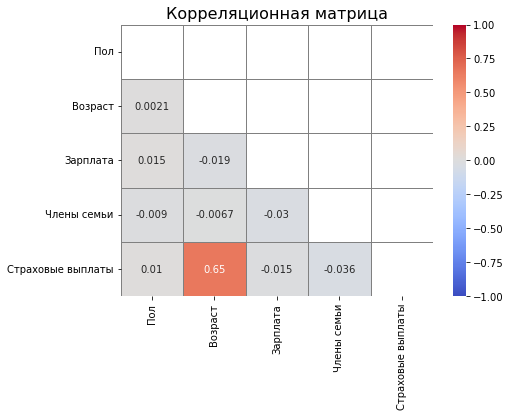

In [7]:
plt.figure(figsize=(7,5))
corr_matrix = sns.heatmap(df.corr(), 
                          annot=True, 
                          vmin=-1, vmax=1, center=0, 
                          cmap='coolwarm',
                          mask=(np.tri(len(df.corr())).T),
                          linewidths=1,
                          linecolor='grey')

corr_matrix.set_title("Корреляционная матрица", fontsize=16)
plt.show()

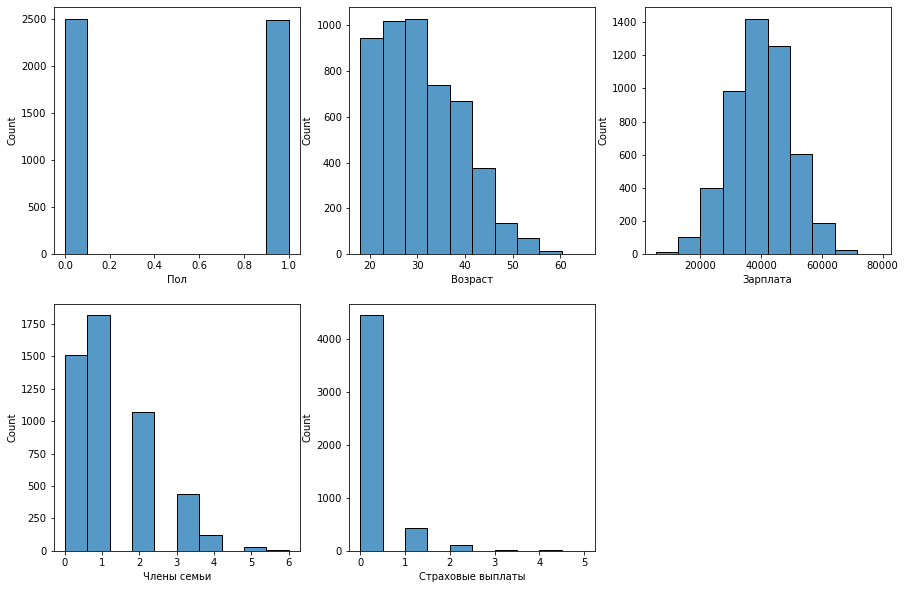

In [7]:
plt.figure(figsize=(15, 10))
counter = 1

for i in df.columns:
    plt.subplot(2, 3, counter)
    sns.histplot(df[i], bins=10)
    counter += 1

plt.show()

Проверим датасет на полные дубликаты

In [8]:
df.duplicated().sum()

153

Удалим эти данные, чтобы они не мешали модели обучения.

In [9]:
df = df.drop_duplicates().reset_index(drop=True)

### Выводы

- На первый взгляд данные выглядят подготовленными для анализа, в них нету пропусков, а так же стоит все признаки имеют необходимый тип данных.
- Обнаружилось 153 дубликата, которые мы удалили
- По предварительному анализу датасета можно сказать следующее:
    - Количество мужчин и женщин в выборке практически равное, возможно такое распределение было достигнуто специально, а не случайным образом.
    - Средний возраст застрахованных составляет 30 лет
    - Средняя зарплата составляет 40 тыс., данные имеют нормальное распределение
    - Большинство застрахованных либо одиночки либо имеют в семье 1 человека. Застрахованных с большими семьями подавляющее меньшинство.
    - Подавляющее большинство за выплатами не обращается
- По кореляционной матрице, видно сильную зависимость количества выплат в зависимости от возраста. Видимо, чем человек старше, тем чаще он обращается за страховыми выплатами.


<a id='part_1_3'></a>
## 1.3 Подготовка данных [▴](#head)

Разделим наши признаки

In [10]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Создадим тренировочные и валидационные выборки

In [11]:
print('features:', features.shape)
print('target:', target.shape)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, 
    random_state=12345,
    test_size=0.25)

print()
print('Тренирвочные:')
print(f'Доля: {len(features_train) / len(df):.2f} | features: {features_train.shape}')
print(f'Доля: {len(target_train) / len(df):.2f} | target: {target_train.shape}\n')

print('Валидационные:')
print(f'Доля: {len(features_valid) / len(df):.2f} | features: {features_valid.shape}')
print(f'Доля: {len(target_valid) / len(df):.2f} | target: {target_valid.shape}\n')

features: (4847, 4)
target: (4847,)

Тренирвочные:
Доля: 0.75 | features: (3635, 4)
Доля: 0.75 | target: (3635,)

Валидационные:
Доля: 0.25 | features: (1212, 4)
Доля: 0.25 | target: (1212,)



<a id='part_1_4'></a>
## 1.4 Пробное обучение [▴](#head)

In [12]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted = model.predict(features_valid)

print(f'MSE = {mean_squared_error(target_valid, predicted):.3f}')
print(f'R2 = {r2_score(target_valid, predicted):.3f}')
print(f'Предсказания:{np.round(predicted, 3)}')

MSE = 0.120
R2 = 0.423
Предсказания:[-0.115  0.217  0.223 ... -0.045 -0.059  0.892]


**Показания линейной регрессии на пробном обучении**
- **MSE: 0.120**
- **R2: 0.423**
- **Предсказания: `-0.115`  `0.217`  `0.223` ... `-0.045` `-0.059`  `0.892`**

<a id='part_2'></a>
# 2. Умножение матриц [▴](#head)

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)
- $y$ — вектор целевого признака
- $P$ — матрица, на которую умножаются признаки
- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)
- Предсказания: $a = Xw$
- Задача обучения: $w = \arg\min_w MSE(Xw, y)$
- Формула обучения: $w = \left(X^T X\right)^{-1} X^T y$


**Свойства матриц:**

- 1: $AA^{-1} = A^{-1}A = E$
- 2: $AE = A = EA$
- 3: $(AB)^{-1} = B^{-1}A^{-1}$
- 4: $(AB)^{T} = B^{T}A^{T}$
- 5: $(AB)C = A(BC)$
- 6: $(ABCD)E = (AB)C(DE) = A(BCD)E$
- 7: ($AA^{T}$ = Квадратная матрица) $\neq$ ($A^{T}A$ = Квадратная матрица)

**Пояснения:**

1. Матрица умноженная на обратимую, дает единичную матрицу
2. Любая матрица умноженная на единичную матрицу той же ширины равна сама себе.
3. Подходит только для обратимых матриц (а значит только для квадратных)
4. Работает со всеми матрицами

<a id='part_2_1'></a>
## 2.1 Вопрос / Ответ [▴](#head)

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Нет, качество линейной регрессии не поменяется.

<a id='part_2_2'></a>
## 2.2 Обоснование [▴](#head)

### Исходные данные:

- Векор весов: $w = \left(X^T \cdot X\right)^{-1} \cdot X^T \cdot y$
- Предсказания: $a = X \cdot w$
- Подставляем $w$ в формулу, получаем исходную формулу предсказаний: $$a = X \cdot \left(X^T \cdot X \right)^{-1} \cdot X^T \cdot y$$

----

### Добавим матрицу: $P$

Умножаем наши признаки $X$ на инвертируемую матрицу $P$ размером равным ширине матрицы $X$, так как инвертируемая матрица квадратная, то при умножении на нее, размерность матрицы $X$ не изменится. 

Получаем новый вектор предсказаний: $a_P$
$$a_P = (X \cdot P) \cdot \left((X \cdot P)^T \cdot (X \cdot P)\right)^{-1} \cdot (X \cdot P)^T \cdot y$$

----

Раскрываем скобки $(X \cdot P)^T$ в $P^T \cdot X^T$
$$a_P = X \cdot P \cdot \left(P^T \cdot X^T \cdot X \cdot P \right)^{-1} \cdot P^T \cdot X^T \cdot y$$

----
Так как матрица $P$ квадратная, а так же произведение матриц $\left( P^T \cdot X^T \cdot X \right)$ даст квадратную матрицу такой же размерности как и $P$, можем раскрыть скобки из $\left( P^T \cdot X^T \cdot X \cdot P \right)^{-1}$ в $P^{-1} \cdot \left(P^T \cdot X^T \cdot X \right)^{-1}$

$$a_P = X \cdot P \cdot P^{-1} \cdot \left(P^T \cdot X^T \cdot X \right)^{-1} \cdot P^T \cdot X^T \cdot y$$

----
Матрица $P^T$ квадратная и произведение $X^T \cdot X$ тоже дает квадратную матрицу. Раскрываем скобки $\left(P^T \cdot X^T \cdot X \right)^{-1}$  в $\left(X^T \cdot X \right)^{-1} \cdot \left(P^{T}\right)^{-1}$
$$a_P = X \cdot P \cdot P^{-1} \cdot \left(X^T \cdot X \right)^{-1} \cdot \left(P^{T}\right)^{-1} \cdot P^T \cdot X^T \cdot y$$

----
Произведение $P \cdot P^{-1}$ дает единичную матрицу и $\left(P^{T}\right)^{-1} \cdot P^T$ тоже дает единичную матрицу
$$a_P = X \cdot E \cdot \left(X^T \cdot X \right)^{-1} \cdot E \cdot X^T \cdot y$$

----
Так как произведение матрицы на единичную матрицу равно самой себе, то $E$ у нас сокращается.
$$a_P = X \cdot \left(X^T \cdot X \right)^{-1} \cdot X^T \cdot y$$

<a id='part_2_conclusions'></a>
## Выводы [▴](#head)

В результате сокращения мы получили формулу равную исходной, а следовательно $a = a_P$

Это означает, что мы получим идентичные предсказания, а следовательно качество линейной регрессии при умножении на обратимую матрицу не изменится.

<a id='part_3'></a>
# 3. Алгоритм преобразования [▴](#head)

<a id='part_3_1'></a>
## 3.1 Алгоритм [▴](#head)

Напишем функции, которые позволят как кодировать так и декодировать наши данные.

### Функция кодирования
- **`Принимает на вход:`** признаки `features_to_coding`, которые необходимо закодировать
- Считывает ширину матрицы признаков `features_to_coding` в переменную `matrix_width`
- Генерирует обратимую матрицу `coding_matrix` размером `matrix_width`x `matrix_width`
- Кодирует признаки с помощью скалярного умножения `coded_features` = `features_to_coding` @ `coding_matrix`
- Генерирует матрицу для раскодирования `matrix_decoder` которая является обратной к матрице `coding_matrix`
- **`Возвращает:`** закодированные признаки `coded_features` и матрицу раскодирования `matrix_decoder`

### Функция декодирования
- **`Принимает на вход:`** признаки для декодирования `features_to_decoding` и декодирующую матрицу `matrix_decoder`
- Создает датафрейм восстановленных признаков `restored_features`, с помощью скалярного умножения матриц `features_to_decoding` @ `matrix_decoder`
- **`Возвращает:`** Восстановленный датафрейм признаков `restored_features`

In [13]:
def coding(features_to_coding):
    np.random.seed(12345)
    
    matrix_width = features_to_coding.shape[1]
    coding_matrix = np.random.randint(1, 10, (matrix_width, matrix_width))
    
    print(f'Матрица для кодирования:\n{coding_matrix}\n')
    
    coded_features = np.dot(features_to_coding, coding_matrix)
    matrix_decoder = np.linalg.inv(coding_matrix)
    
    print(f'Закодированные признаки:\n{coded_features}\n')
    
    print(f'Матрица для декодирования:\n{matrix_decoder}')
    
    return coded_features, matrix_decoder

In [14]:
def decoding(features_to_decoding, matrix_decoder):
    restored_features = pd.DataFrame(np.dot(features_to_decoding, matrix_decoder))
    return restored_features

<a id='part_3_2'></a>
## 3.2 Обоснование [▴](#head)

Мы показали обоснование с помощью формул, теперь проверим результат на практике.

### Создадим данные для проверки:

In [15]:
# создадим матрицу признаков
features_x = np.array([
    [2,9],
    [1,3],
    [5,7],
    [2,6]])

# создадим вектор целевых значений
y = np.array([1,2,1,1])

### Создадим необходимые переменные и закодируем данные:

In [16]:
# Исходная задача
X = np.concatenate((np.ones((features_x.shape[0], 1)), features_x), axis=1)
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

# Закодируем наши признаки с помощью функции
XP, decoding_matrix = coding(X)

# Модифицированная задача
w_P = (np.linalg.inv(XP.T.dot(XP)).dot(XP.T)).dot(y)

Матрица для кодирования:
[[3 6 2]
 [5 6 3]
 [2 7 2]]

Закодированные признаки:
[[31. 81. 26.]
 [14. 33. 11.]
 [42. 85. 31.]
 [25. 60. 20.]]

Матрица для декодирования:
[[ 1.8 -0.4 -1.2]
 [ 0.8 -0.4 -0.2]
 [-4.6  1.8  2.4]]


### Проверяем результат:

In [17]:
print('Исходная задача:')
print(f'Предсказания: {X @ w}')
print(f'MSE = {mean_squared_error(y, X @ w):.3f}')
print(f'R2 = {r2_score(y, X @ w):.3f}')

print()

print('Модифицированная задача, умножаем 𝑋 на 𝑃:')
print(f'Предсказания: {XP @ w_P}')
print(f'MSE = {mean_squared_error(y, XP @ w_P):.3f}')
print(f'R2 = {r2_score(y, XP @ w_P):.3f}')

Исходная задача:
Предсказания: [0.8700361  1.85379061 0.95126354 1.32490975]
MSE = 0.037
R2 = 0.805

Модифицированная задача, умножаем 𝑋 на 𝑃:
Предсказания: [0.8700361  1.85379061 0.95126354 1.32490975]
MSE = 0.037
R2 = 0.805


### Пробуем раскодировать признаки:

In [18]:
print(f'Закодированные признаки:\n{XP}]\n')
print(f'Восстановленные признаки:\n{decoding(XP, decoding_matrix)}')

Закодированные признаки:
[[31. 81. 26.]
 [14. 33. 11.]
 [42. 85. 31.]
 [25. 60. 20.]]]

Восстановленные признаки:
     0    1    2
0  1.0  2.0  9.0
1  1.0  1.0  3.0
2  1.0  5.0  7.0
3  1.0  2.0  6.0


<a id='part_3_conclusions'></a>
## Выводы [▴](#head)

Проверили на практике, что предсказания, и качество модели не поменялось. А так же, восстановили закодированные данные. 

Настало время проверить алгоритм на линейной регрессии библиотеки `sklearn` 

<a id='part_4'></a>
# 4. Проверка алгоритма [▴](#head)

<a id='part_4_1'></a>
## 4.1 Кодируем данные [▴](#head)

Закодируем признаки и получим матрицу для раскодировки.

In [19]:
coded_features, decoding_matrix = coding(features)

Матрица для кодирования:
[[3 6 2 5]
 [6 3 2 7]
 [2 8 7 1]
 [3 2 3 7]]

Закодированные признаки:
[[ 99452. 396931. 347287.  49899.]
 [ 76279. 304140. 266095.  38329.]
 [ 42174. 168087. 147058.  21203.]
 ...
 [ 67926. 271264. 237346.  34054.]
 [ 65544. 261678. 228955.  32880.]
 [ 81374. 324892. 284261.  40808.]]

Матрица для декодирования:
[[-0.16207455  0.35332253  0.05024311 -0.24473258]
 [ 0.24149109 -0.06645057 -0.00486224 -0.10534846]
 [-0.24473258 -0.00648298  0.1458671   0.16045381]
 [ 0.10534846 -0.12965964 -0.08265802  0.20907618]]


Разобьем наш массив на тренировочный и валидационный:

In [20]:
features_train, features_valid, target_train, target_valid = train_test_split(
    coded_features, target, 
    random_state=12345,
    test_size=0.25)

Теперь обучим модель на закодированных признаках и проверим результат:

In [21]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted = model.predict(features_valid)

print(f'MSE = {mean_squared_error(target_valid, predicted):.3f}')
print(f'R2 = {r2_score(target_valid, predicted):.3f}')
print(f'Предсказания:{np.round(predicted, 3)}')

MSE = 0.120
R2 = 0.423
Предсказания:[-0.115  0.217  0.223 ... -0.045 -0.059  0.892]


**Сравнение результатов**

Вспомним показания линейной регрессии на **`пробном обучении:`**
- **MSE: 0.120**
- **R2: 0.423**
- **Предсказания: `-0.115`  `0.217`  `0.223` ... `-0.045` `-0.059`  `0.892`**

Качество модели и предсказания абсолютно идентичные, что подтверждает нашу гипотезу о том, что умножение признаков на обратимую матрицу никак не влияет на качество линейной регрессии.

<a id='part_4_2'></a>
## 4.2 Восстанавливаем данные [▴](#head)

Теперь попробуем восстановить данные

In [22]:
decoded_features = decoding(coded_features, decoding_matrix)
display(decoded_features)

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.0
1,-1.455192e-11,46.0,38000.0,1.0
2,0.000000e+00,29.0,21000.0,0.0
3,0.000000e+00,21.0,41700.0,2.0
4,1.000000e+00,28.0,26100.0,0.0
...,...,...,...,...
4842,0.000000e+00,28.0,35700.0,2.0
4843,-1.455192e-11,34.0,52400.0,1.0
4844,0.000000e+00,20.0,33900.0,2.0
4845,1.000000e+00,22.0,32700.0,3.0


Вернем заголовки

In [23]:
decoded_features.columns = features.columns
display(decoded_features)

,Пол,Возраст,Зарплата,Члены семьи
0,1.000000e+00,41.0,49600.0,1.0
1,-1.455192e-11,46.0,38000.0,1.0
2,0.000000e+00,29.0,21000.0,0.0
3,0.000000e+00,21.0,41700.0,2.0
4,1.000000e+00,28.0,26100.0,0.0
...,...,...,...,...
4842,0.000000e+00,28.0,35700.0,2.0
4843,-1.455192e-11,34.0,52400.0,1.0
4844,0.000000e+00,20.0,33900.0,2.0
4845,1.000000e+00,22.0,32700.0,3.0


Избавимся от неточностей в расчетах

In [24]:
decoded_features['Пол'] = decoded_features['Пол'].round().abs()
display(decoded_features)

,Пол,Возраст,Зарплата,Члены семьи
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0
...,...,...,...,...
4842,0.0,28.0,35700.0,2.0
4843,0.0,34.0,52400.0,1.0
4844,0.0,20.0,33900.0,2.0
4845,1.0,22.0,32700.0,3.0


Исходные данные полностью восстановлены.

<a id='part_4_conclusions'></a>
## Выводы [▴](#head)

Мы проанализировали данные о страховых выплатах, клиентов компании "Хоть потоп". Данные оказались достаточно чистыми и предобработки не потребовалось.

В ходе анализа выяснилось:
- Количество выплат сильно зависит от возраста застразованного, чем возраст выше, тем чаще обращаются за выплатами.
- Другие параметры не имеют прямой зависимости с количеством и частотой выплат.
- В основном за страховкой обращаются люди с небольшими семьями либо одиночки.
- Средний доход застрахованных составляет 40 тыс. руб.

В нашей задаче требовалось закодировать персональные данные клиентов, и не потерять в последующем качества обучения Линейной Регрессии. Мы провели исследование и выяснили следующее:
- Признаки можно закодировать умножив их на обратимую матрицу
- Качество Линейной Регрессии при этом не уменьшается
- Так же после таких операций сохраняется возможноть раскодировать закодированные признаки, с возможной потерей точности данных на уровне $10^{-11}$



<a id='check_list'></a>
## Чек-лист готовности проекта [▴](#head)

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования